# Prediction using Unsupervised Learning

### Submitted by - Abdullah Jami

In [257]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score


In [4]:
Dataset_url = "https://drive.google.com/uc?id=11Iq7YvbWZbt8VXjfm06brx66b10YiwK-&export=download"
try: 
    df = pd.read_csv(filepath_or_buffer=Dataset_url)
    print("Dataset imported successfully and dataframe created")
except NameError:
    print(NameError)
    print("Could not import dataset")

Dataset imported successfully and dataframe created


In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe(include="all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

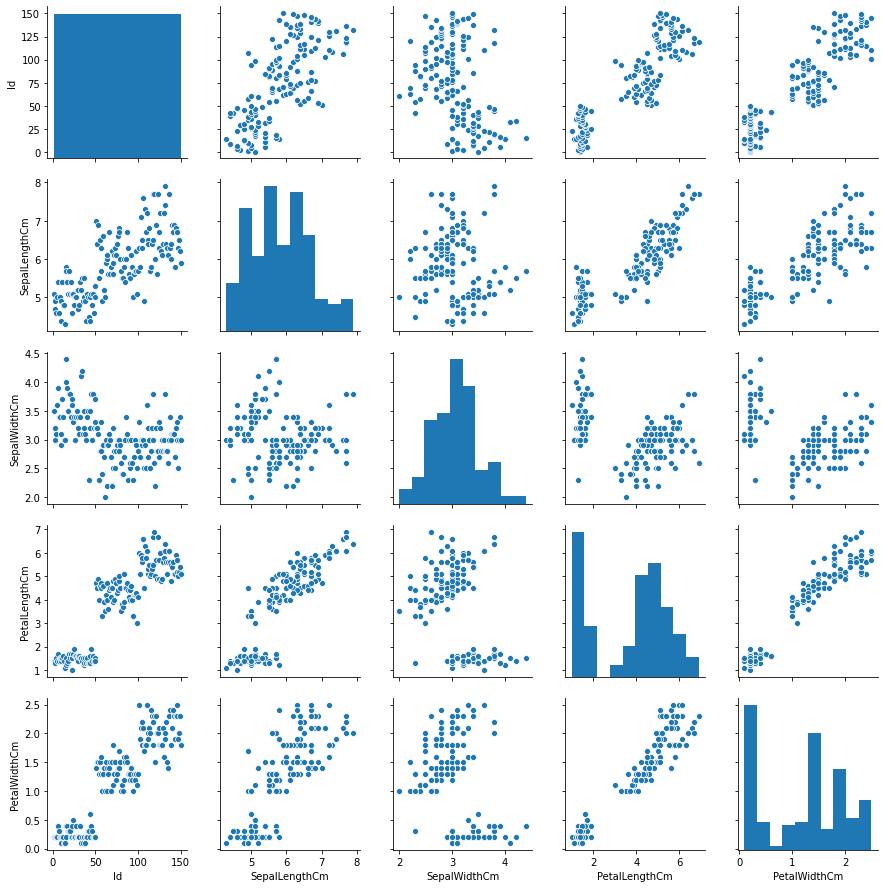

In [11]:
sns.pairplot(df)

In [14]:
df["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [12]:
data = df.drop(["Id", "Species"], axis = 1)
Species = df["Species"]

In [11]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Determination of Optimum number of cluster
    * From the dataset, we have observed that there are three labeled species of irises.
    * Hence, the optimum number should be around 3.

In [53]:
cluster_size = range(1,10)
inertias = []
labels = []

In [54]:
for k in cluster_size:
    model = KMeans(n_clusters = k, random_state=1000)
    result = model.fit(data)
    inertias.append(result.inertia_)
    labels.append(result.labels_)
    '''label_df[k]=result.labels_.values
    print(f"Number of iterations ran: {result.n_iter_}")
    print(f"Labels: {result.labels_}")
    print(f"Cluster Centroids: {result.cluster_centers_}\n")'''
    

In [55]:
inertias

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.56163015873016,
 38.95701115711985,
 34.35610589717513,
 29.963345571095573,
 28.246291686383792]

In [64]:
labels_dict=dict()
for x in cluster_size: 
    labels_dict[x]= labels[x-1]
label_df = pd.DataFrame(labels_dict)
label_df.head()

,1,2,3,4,5,6,7,8,9
0,0,1,1,1,0,0,4,5,0
1,0,1,1,1,0,4,1,1,5
2,0,1,1,1,0,4,1,1,5
3,0,1,1,1,0,4,1,1,5
4,0,1,1,1,0,0,4,5,0


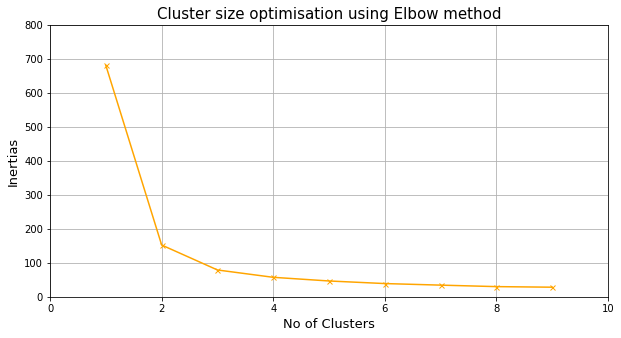

In [40]:
plt.figure(figsize=[10,5])
plt.plot(cluster_size, inertias, marker="x", markersize=5, color="orange")
plt.title("Cluster size optimisation using Elbow method", fontsize = 15)
plt.xlabel("No of Clusters", fontsize = 13)
plt.ylabel("Inertias", fontsize = 13)
plt.xlim(0,10)
plt.ylim(0,800)
plt.grid()
plt.show()

In [93]:
# Silhouette score for predicted data for k clusters
for k in cluster_size:
    if k>=2:
        if k<=(data.shape[0] - 1):
            Sil_score = silhouette_score(data, label_df[k])
            print(f"Silhouette Score for {k} clusters: {Sil_score}")
        else:
            print(f"Cannot calculate Silhouette Score for {k} cluster size.")
    else:
        print(f"Cannot calculate Silhouette Score for {k} cluster size.")
#silhouette_score(data, label_df[2])

Cannot calculate Silhouette Score for 1 cluster size.
Silhouette Score for 2 clusters: 0.6808136202936816
Silhouette Score for 3 clusters: 0.5525919445499757
Silhouette Score for 4 clusters: 0.4972279726640147
Silhouette Score for 5 clusters: 0.49285559183161204
Silhouette Score for 6 clusters: 0.37121805054590074
Silhouette Score for 7 clusters: 0.3549797165055852
Silhouette Score for 8 clusters: 0.36142018656386554
Silhouette Score for 9 clusters: 0.34900773597365475


 For n_clusters = 2 The average silhouette_score is : 0.34900773597365475 


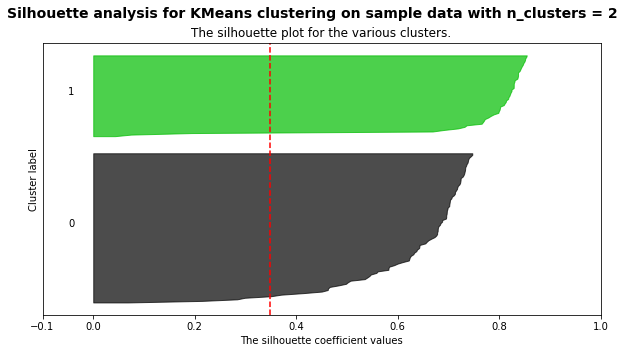

 For n_clusters = 3 The average silhouette_score is : 0.6808136202936816 


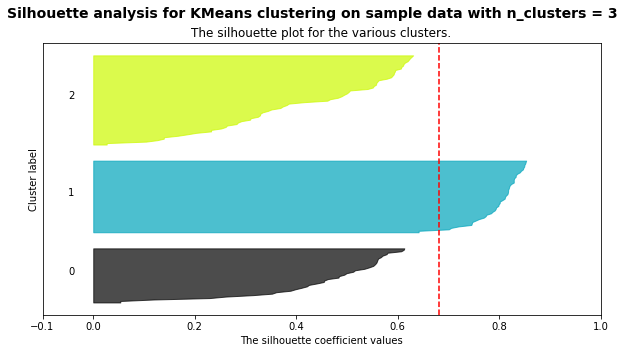

 For n_clusters = 4 The average silhouette_score is : 0.5525919445499757 


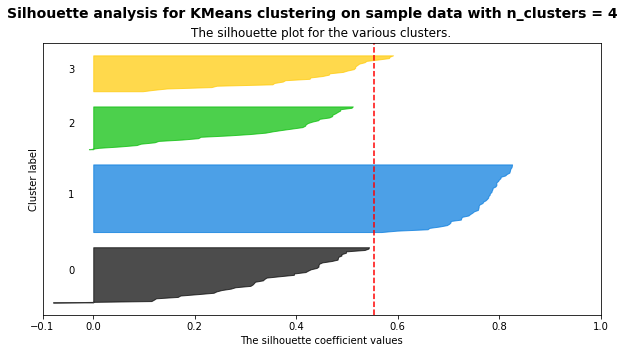

 For n_clusters = 5 The average silhouette_score is : 0.4972279726640147 


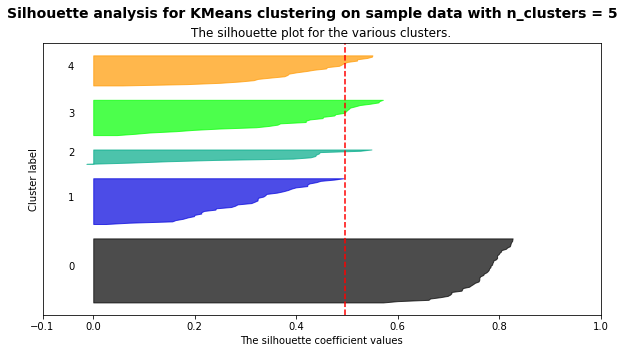

 For n_clusters = 6 The average silhouette_score is : 0.49285559183161204 


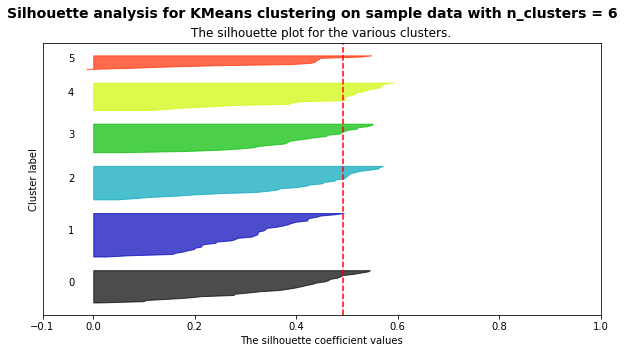

 For n_clusters = 7 The average silhouette_score is : 0.37121805054590074 


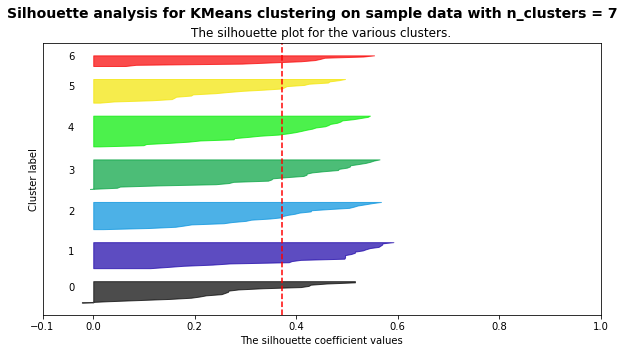

 For n_clusters = 8 The average silhouette_score is : 0.3549797165055852 


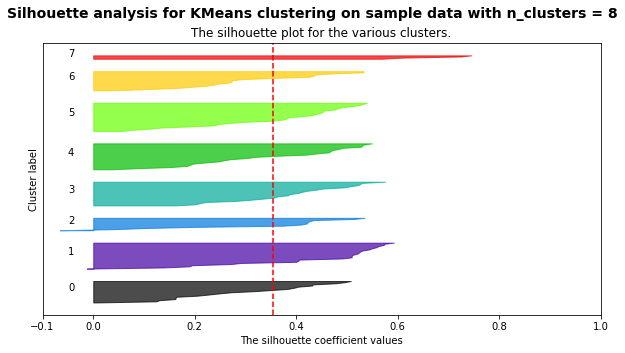

 For n_clusters = 9 The average silhouette_score is : 0.36142018656386554 


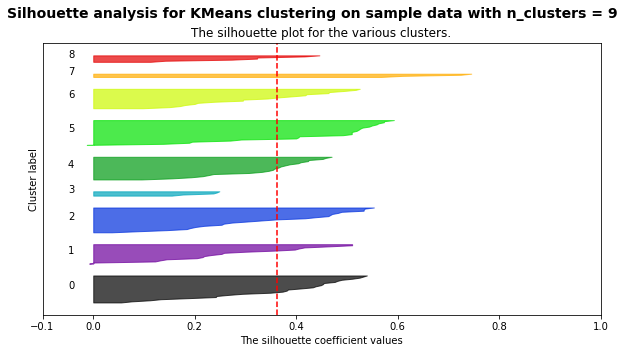

In [121]:
for k in cluster_size:
    if k>=2:
        fig, ax1 = plt.subplots()
        fig.set_size_inches(10, 5)

        ax1.set_xlim([-0.1,1])

        model = KMeans(n_clusters = k, random_state=1000)
        cluster_labels = model.fit_predict(data)
        CYELLOWBG2 = '\33[103m'
        CEND = '\33[0m'
        print(CYELLOWBG2, "For n_clusters =", k, "The average silhouette_score is :", silhouette_avg, CEND)
        
        sample_silhouette_values = silhouette_samples(data, cluster_labels)

        # Subplot 1
        y_lower = 10
        for i in range(k):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]

            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / k)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")     

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
        
        '''
        # Subplot 2
        colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
        ax2.scatter(data[:, 0], data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        '''
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % k), fontsize=14, fontweight='bold')
        silhouette_avg = silhouette_score(data, cluster_labels)
        
    plt.show()

### <font color= "green">Insights: </font>
1. From both Elbow method and silhouette method, we can conclude that the optimum number of cluster is three which is same as Actual Labeling.
2. In Elbow method, the inertia is the proportion of variance explained by that many number of clusters.
3. For the optimum number of cluster the inertia was found out to be 78.94

## Applying KMeans to the dataset

In [133]:
model = KMeans(n_clusters = 3, random_state=1000)
result = model.fit(data)
final_labels = model.fit_predict(data)

In [134]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [135]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [179]:
Error_df = pd.DataFrame()
Error_df["Actual Species"]= df["Species"]
Error_df["Predicted Species"] = final_labels

Error_df.loc[Error_df["Actual Species"] == "Iris-setosa",  "Actual Label encoded"] = 1
Error_df.loc[Error_df["Actual Species"] == "Iris-versicolor",  "Actual Label encoded"] = 2
Error_df.loc[Error_df["Actual Species"] == "Iris-virginica",  "Actual Label encoded"] = 0
Error_df["Actual Label encoded"] = Error_df["Actual Label encoded"].astype("int")

Error_df["Correctly Predicted"] = (Error_df["Actual Label encoded"] == Error_df["Predicted Species"])

plot_df = df.copy()
plot_df["Predicted Species"] = final_labels

In [258]:
plot_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [259]:
Error_df.head()

,Actual Species,Predicted Species,Actual Label encoded,Correctly Predicted
0,Iris-setosa,1,1,True
1,Iris-setosa,1,1,True
2,Iris-setosa,1,1,True
3,Iris-setosa,1,1,True
4,Iris-setosa,1,1,True


In [169]:
Error_df["Correctly Predicted"].value_counts()

True     134
False     16
Name: Correctly Predicted, dtype: int64

<Figure size 720x504 with 0 Axes>

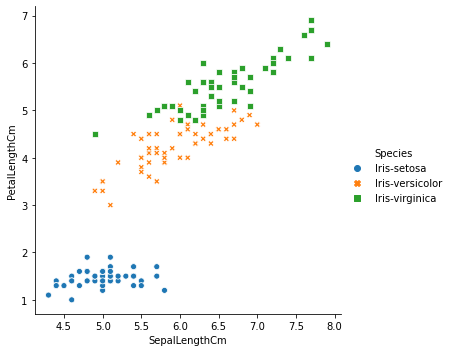

In [221]:
plt.figure(figsize=[10,7])
sns.relplot(x = "SepalLengthCm" , y = "PetalLengthCm" , hue = "Species", style = "Species", data = df)
plt.show()

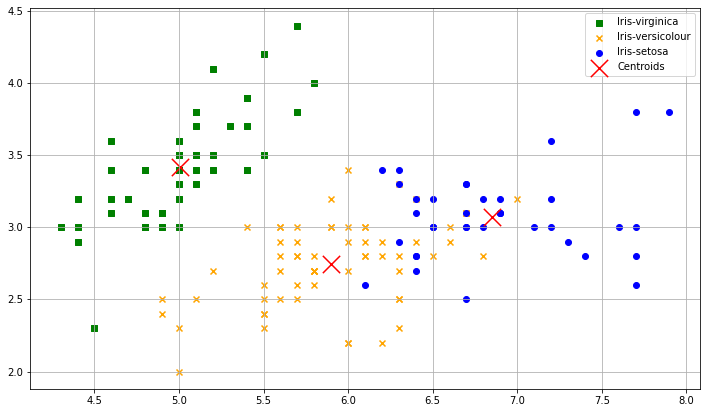

In [255]:
plt.figure(figsize=[12,7])
cat1_index = plot_df[plot_df["Predicted Species"] == 1].index
cat2_index = plot_df[plot_df["Predicted Species"] == 2].index
cat0_index = plot_df[plot_df["Predicted Species"] == 0].index

plt.scatter(data["SepalLengthCm"].iloc[cat1_index], data["SepalWidthCm"].iloc[cat1_index], marker="s", c = "green", label="Iris-virginica")
plt.scatter(data["SepalLengthCm"].iloc[cat2_index], data["SepalWidthCm"].iloc[cat2_index], marker="x", c = "orange", label="Iris-versicolour")
plt.scatter(data["SepalLengthCm"].iloc[cat0_index], data["SepalWidthCm"].iloc[cat0_index], marker="o", c = "blue", label="Iris-setosa")

x = model.cluster_centers_[:,0]
y = model.cluster_centers_[:,1]
plt.scatter(x, y, marker = "x", c= "red", label="Centroids", s=300)
plt.legend()
plt.grid()
plt.show()

<Figure size 720x360 with 0 Axes>

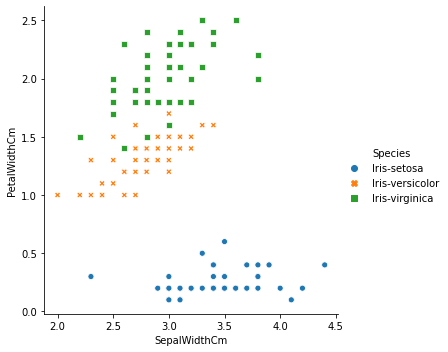

In [176]:
plt.figure(figsize=[10,5])
sns.relplot(x = "SepalWidthCm" , y = "PetalWidthCm" , hue = "Species", style = "Species", data = df )
plt.show()

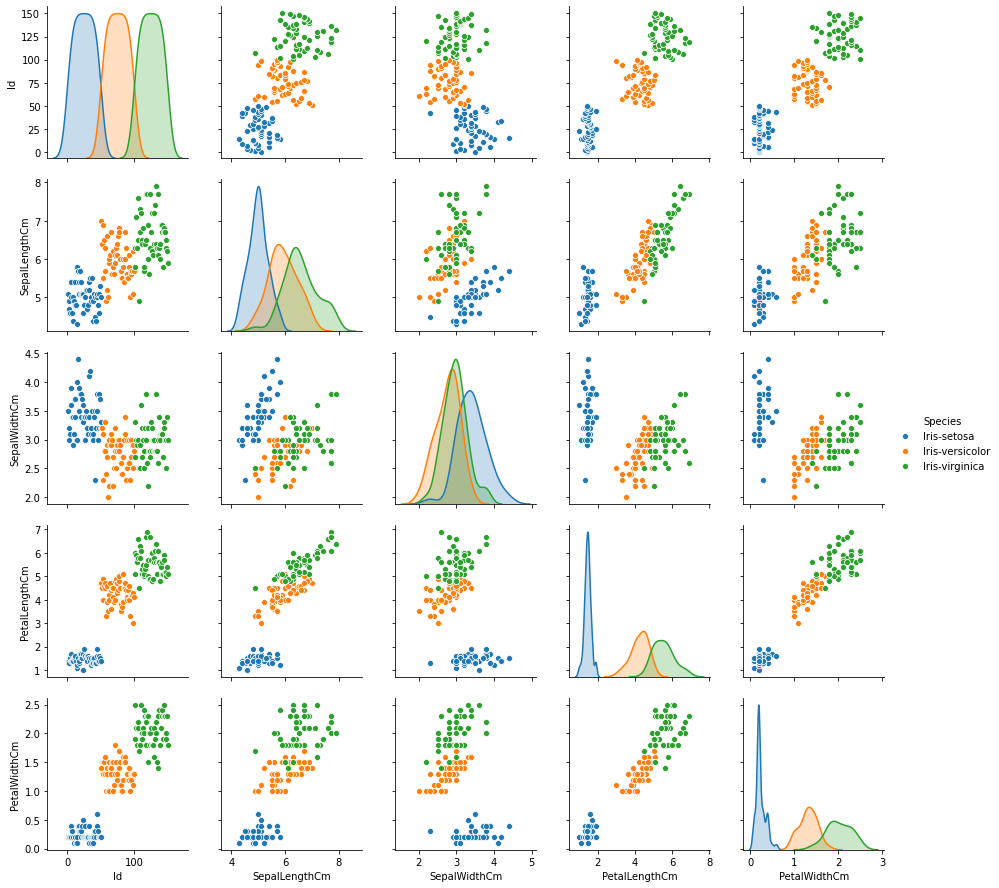

In [174]:
sns.pairplot(df, hue = "Species")

## Clustering performance evaluation
* As we have the ground truth classes i.e. the actual categorical factor avaiable for analysis, we can run "Adjusted Rand index"

In [263]:
ARI_score = adjusted_rand_score(Error_df["Actual Label encoded"], Error_df["Predicted Species"])
ARI_score

0.7302382722834697

### <font color= "green">Insights: </font>
1. ARI score = 0.73 (value range = [-1, 1] 1 being perfect labeling, -1 being bad or independent labeling)